# 02_model_training_and_evaluation.ipynb

**Project**: Lumbar Spine Degenerative Classification  
**Description**: This notebook orchestrates the training and evaluation of the deep learning models described in the project.  

---

## Table of Contents
1. [Environment and Imports](#section1)  
2. [Configuration Loading](#section2)  
3. [Model Training](#section3)  
4. [Evaluation](#section4)

---

<a id="section1"></a>
## 1. Environment and Imports

Ensures the correct Python environment, updates paths if necessary, and imports relevant modules.

In [1]:
import os
import sys
import torch
import glob

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

module_path = os.path.abspath(os.path.join("src"))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.model.train_model import train_model
from src.evaluate.evaluate_model import evaluate_model
from src.data.ingest_data import load_config

print("Environment diagnostics:")
print(f"  Working directory : {os.getcwd()}")
print(f"  Python executable : {sys.executable}")

Environment diagnostics:
  Working directory : /home/jkskw/git/ml_lumbar_mri
  Python executable : /home/jkskw/git/ml_lumbar_mri/venv/bin/python


<a id="section2"></a>
## 2. Configuration Loading

Retrieves training-related settings (e.g. classification mode, model architecture, etc.) from `config.yml`.

In [2]:
CONFIG_PATH = "config.yml"
config = load_config(CONFIG_PATH)

print("Configuration loaded successfully.")
print("Project:", config["project"]["name"])
print("Description:", config["project"]["description"])
print("Classification Mode:", config["training"]["classification_mode"])
print("Selected Folder:", config["training"]["selected_tensor_folder"])

Configuration loaded successfully.
Project: Lumbar Spine Degenerative Classification
Description: Automated evaluation of degenerative lumbar spine changes from MRI images using deep learning.
Classification Mode: multi_binary
Selected Folder: target_window_128x128_5D_B2A2


<a id="section3"></a>
## 3. Model Training

Calls the `train_model` function from `train_model.py`.  
This will:
- Load data from CSV
- Split into train/val/test sets
- Create datasets and dataloaders
- Build the selected neural network architecture
- Train with early stopping
- Save logs and best model in `./models/...`

In [3]:
train_model(CONFIG_PATH)

[2025-03-13 10:25:07 INFO] src.model.train_model: [INIT] Starting train_model...
[2025-03-13 10:25:07 INFO] src.model.train_model: Training Configuration:
[2025-03-13 10:25:07 INFO] src.model.train_model: classification_mode: multi_binary
[2025-03-13 10:25:07 INFO] src.model.train_model: disease: lnfn
[2025-03-13 10:25:07 INFO] src.model.train_model: selected_tensor_folder: target_window_128x128_5D_B2A2
[2025-03-13 10:25:07 INFO] src.model.train_model: model_arch: resnet3d_18
[2025-03-13 10:25:07 INFO] src.model.train_model: pretrained_ckpt_path: None
[2025-03-13 10:25:07 INFO] src.model.train_model: test_size: 0.2
[2025-03-13 10:25:07 INFO] src.model.train_model: validation_split_of_temp: 0.5
[2025-03-13 10:25:07 INFO] src.model.train_model: batch_size: 16
[2025-03-13 10:25:07 INFO] src.model.train_model: num_epochs: 10
[2025-03-13 10:25:07 INFO] src.model.train_model: learning_rate: 0.001
[2025-03-13 10:25:07 INFO] src.model.train_model: use_lr_scheduler: False
[2025-03-13 10:25:07 I

Total training samples skipped: 42 / 1571


[2025-03-13 10:25:12 INFO] src.model.train_model: Initial learning rate: 0.001000
[2025-03-13 10:25:12 INFO] src.model.train_model: == Training with classification_mode=multi_binary, model_arch=resnet3d_18 ==
[2025-03-13 10:25:12 INFO] src.model.train_model: Train size=1571, Val size=196, Test size=197
[2025-03-13 10:25:12 INFO] src.model.train_model: Device = cuda, LR=0.001000, BatchSize=16, Epochs=10, Dropout=0.5


Epoch 1/10 [Train]:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 1/10 [Val]:   0%|          | 0/13 [00:00<?, ?it/s]

[2025-03-13 10:25:33 INFO] src.model.train_model: [Epoch 1/10] Train Loss=1.8039 | Val Loss=1.6864 | Train Acc=0.6708 | Val Acc=0.7016
[2025-03-13 10:25:33 INFO] src.model.train_model: >> New best model saved at ./models/resnet3d_18_multi_binary_target_window_128x128_5D_B2A2_16_10_0.001_0.5_20250313_102507/best_model.pth
[2025-03-13 10:25:33 INFO] src.model.train_model: >> New best model saved at ./models/resnet3d_18_multi_binary_target_window_128x128_5D_B2A2_16_10_0.001_0.5_20250313_102507/best_val_loss_model.pth


Epoch 2/10 [Train]:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 2/10 [Val]:   0%|          | 0/13 [00:00<?, ?it/s]

[2025-03-13 10:25:53 INFO] src.model.train_model: [Epoch 2/10] Train Loss=1.5653 | Val Loss=1.3852 | Train Acc=0.7301 | Val Acc=0.7871
[2025-03-13 10:25:53 INFO] src.model.train_model: >> New best model saved at ./models/resnet3d_18_multi_binary_target_window_128x128_5D_B2A2_16_10_0.001_0.5_20250313_102507/best_model.pth
[2025-03-13 10:25:54 INFO] src.model.train_model: >> New best model saved at ./models/resnet3d_18_multi_binary_target_window_128x128_5D_B2A2_16_10_0.001_0.5_20250313_102507/best_val_loss_model.pth


Epoch 3/10 [Train]:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 3/10 [Val]:   0%|          | 0/13 [00:00<?, ?it/s]

[2025-03-13 10:26:14 INFO] src.model.train_model: [Epoch 3/10] Train Loss=1.4830 | Val Loss=1.3911 | Train Acc=0.7506 | Val Acc=0.7731


Epoch 4/10 [Train]:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 4/10 [Val]:   0%|          | 0/13 [00:00<?, ?it/s]

[2025-03-13 10:26:33 INFO] src.model.train_model: [Epoch 4/10] Train Loss=1.4201 | Val Loss=1.3841 | Train Acc=0.7687 | Val Acc=0.7906
[2025-03-13 10:26:34 INFO] src.model.train_model: >> New best model saved at ./models/resnet3d_18_multi_binary_target_window_128x128_5D_B2A2_16_10_0.001_0.5_20250313_102507/best_model.pth
[2025-03-13 10:26:34 INFO] src.model.train_model: >> New best model saved at ./models/resnet3d_18_multi_binary_target_window_128x128_5D_B2A2_16_10_0.001_0.5_20250313_102507/best_val_loss_model.pth


Epoch 5/10 [Train]:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 5/10 [Val]:   0%|          | 0/13 [00:00<?, ?it/s]

[2025-03-13 10:26:55 INFO] src.model.train_model: [Epoch 5/10] Train Loss=1.3688 | Val Loss=1.2471 | Train Acc=0.7842 | Val Acc=0.8063
[2025-03-13 10:26:55 INFO] src.model.train_model: >> New best model saved at ./models/resnet3d_18_multi_binary_target_window_128x128_5D_B2A2_16_10_0.001_0.5_20250313_102507/best_model.pth
[2025-03-13 10:26:56 INFO] src.model.train_model: >> New best model saved at ./models/resnet3d_18_multi_binary_target_window_128x128_5D_B2A2_16_10_0.001_0.5_20250313_102507/best_val_loss_model.pth


Epoch 6/10 [Train]:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 6/10 [Val]:   0%|          | 0/13 [00:00<?, ?it/s]

[2025-03-13 10:27:18 INFO] src.model.train_model: [Epoch 6/10] Train Loss=1.3167 | Val Loss=1.3032 | Train Acc=0.7949 | Val Acc=0.8010


Epoch 7/10 [Train]:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 7/10 [Val]:   0%|          | 0/13 [00:00<?, ?it/s]

[2025-03-13 10:27:39 INFO] src.model.train_model: [Epoch 7/10] Train Loss=1.2746 | Val Loss=1.2210 | Train Acc=0.8014 | Val Acc=0.8063
[2025-03-13 10:27:40 INFO] src.model.train_model: >> New best model saved at ./models/resnet3d_18_multi_binary_target_window_128x128_5D_B2A2_16_10_0.001_0.5_20250313_102507/best_val_loss_model.pth


Epoch 8/10 [Train]:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 8/10 [Val]:   0%|          | 0/13 [00:00<?, ?it/s]

[2025-03-13 10:28:02 INFO] src.model.train_model: [Epoch 8/10] Train Loss=1.2321 | Val Loss=1.2902 | Train Acc=0.8005 | Val Acc=0.8168
[2025-03-13 10:28:02 INFO] src.model.train_model: >> New best model saved at ./models/resnet3d_18_multi_binary_target_window_128x128_5D_B2A2_16_10_0.001_0.5_20250313_102507/best_model.pth


Epoch 9/10 [Train]:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 9/10 [Val]:   0%|          | 0/13 [00:00<?, ?it/s]

[2025-03-13 10:28:31 INFO] src.model.train_model: [Epoch 9/10] Train Loss=1.1645 | Val Loss=1.5056 | Train Acc=0.8225 | Val Acc=0.7382


Epoch 10/10 [Train]:   0%|          | 0/99 [00:00<?, ?it/s]

Epoch 10/10 [Val]:   0%|          | 0/13 [00:00<?, ?it/s]

[2025-03-13 10:28:57 INFO] src.model.train_model: [Epoch 10/10] Train Loss=1.2009 | Val Loss=1.4499 | Train Acc=0.8140 | Val Acc=0.7661
[2025-03-13 10:28:57 INFO] src.model.train_model: [INFO] Training complete. Logs & model in ./models/resnet3d_18_multi_binary_target_window_128x128_5D_B2A2_16_10_0.001_0.5_20250313_102507


<a id="section4"></a>
## 4. Evaluation

The `evaluate_model` function from `evaluate_model.py` allows evaluating on a specified split.
By default, it re-splits or tries to load the test set. Then it prints metrics (accuracy, confusion matrix, etc.)

Latest model folder: models/resnet3d_18_multi_binary_target_window_128x128_5D_B2A2_16_10_0.001_0.5_20250313_102507
Model path: models/resnet3d_18_multi_binary_target_window_128x128_5D_B2A2_16_10_0.001_0.5_20250313_102507/best_model.pth
[INFO] Loading model from models/resnet3d_18_multi_binary_target_window_128x128_5D_B2A2_16_10_0.001_0.5_20250313_102507/best_model.pth using arch=resnet3d_18


Evaluating on test set:   0%|          | 0/13 [00:00<?, ?it/s]

[INFO] Evaluation Completed.

=== Metrics for SCS ===
Accuracy: 0.9101
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94       143
         1.0       0.85      0.76      0.80        46

    accuracy                           0.91       189
   macro avg       0.89      0.86      0.87       189
weighted avg       0.91      0.91      0.91       189

Confusion Matrix:
 [[137   6]
 [ 11  35]] 



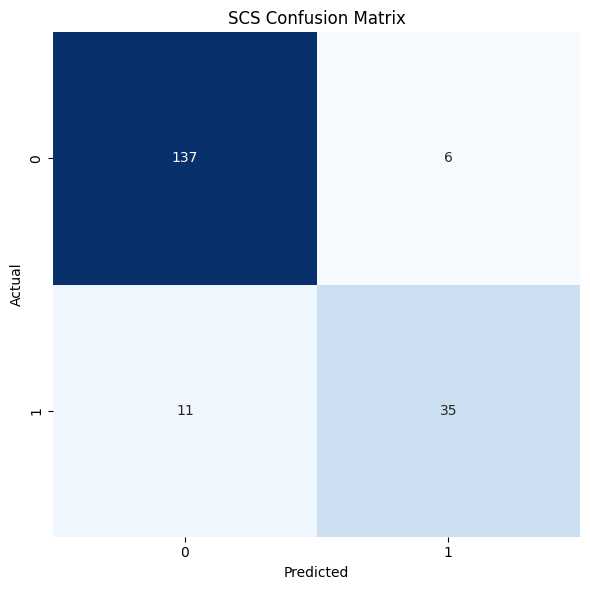

=== Metrics for LNfN ===
Accuracy: 0.7778
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83       115
         1.0       0.81      0.57      0.67        74

    accuracy                           0.78       189
   macro avg       0.79      0.74      0.75       189
weighted avg       0.78      0.78      0.77       189

Confusion Matrix:
 [[105  10]
 [ 32  42]] 



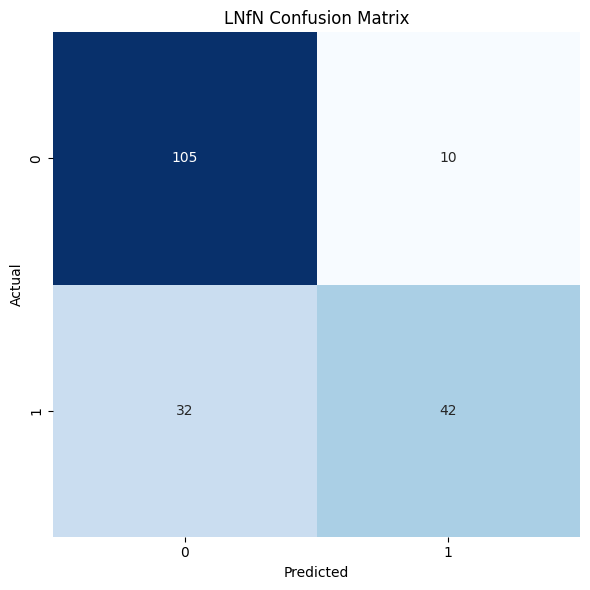

=== Metrics for RNfN ===
Accuracy: 0.8148
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       117
         1.0       0.84      0.64      0.72        72

    accuracy                           0.81       189
   macro avg       0.82      0.78      0.79       189
weighted avg       0.82      0.81      0.81       189

Confusion Matrix:
 [[108   9]
 [ 26  46]] 



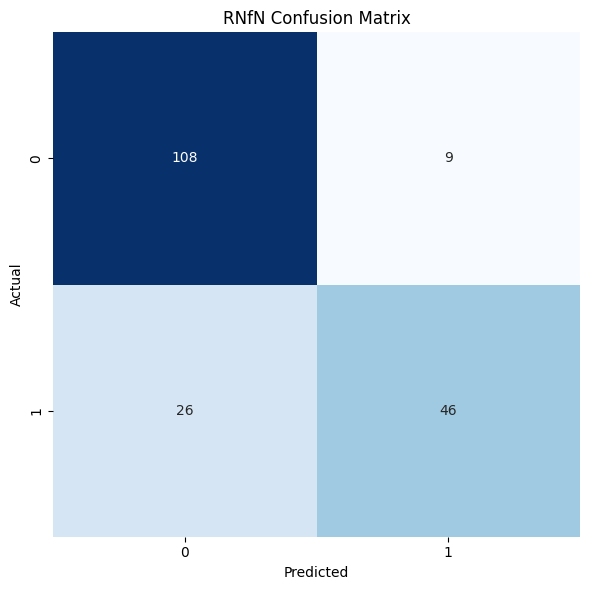

In [4]:
import glob

# Automatically find the last created folder.
model_folders = glob.glob("models/*_*_*")
model_folders = sorted(model_folders, key=os.path.getmtime)
latest_folder = model_folders[-1] if model_folders else None

print("Latest model folder:", latest_folder)

# The best model .pth is saved as "best_model.pth" inside that folder.
model_path = os.path.join(latest_folder, "best_model.pth") if latest_folder else None
print("Model path:", model_path if model_path and os.path.exists(model_path) else "No model found.")

if model_path and os.path.exists(model_path):
    evaluate_model(model_path=model_path, config_path=CONFIG_PATH, split="test")
else:
    print("[WARNING] No valid model .pth file found. Skipping evaluation.")